In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gwdetchar.io.datafind import get_data
from gwpy.timeseries import TimeSeries
from gwpy.timeseries import TimeSeriesDict
from scipy.interpolate import UnivariateSpline, interp1d

from ts_outlier_detection import *
from ts_outlier_detection.plotting import *

## Test Data Fetching

In [ ]:
channel = "L1:DMT-SNSW_EFFECTIVE_RANGE_MPC.mean"
gps_start = 1268958018
gps_end = 1269011267

ex_ts = TimeSeries.get(channel, gps_start, gps_end)
fig, ax = plt.subplots(figsize=[12,4])
ax.plot(ex_ts)
ax.set_title("Example TimeSeries plot")
ax.set_xlabel("Time from " + str(gps_start))
ax.set_ylabel("Range in Mpc")

## Compare outlier removal methods

/home/azimuth/.local/lib/python3.9/site-packages/gwpy/timeseries/io/nds2.py:122: UserWarning: Requested at least one minute trend, but start and stop GPS times are not multiples of 60. Times will be expanded outwards to compensate
  warnings.warn("Requested at least one minute trend, but "
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/timeseries/core.py:1149: NDSWarning: Low level daq error occured [26]: Requested data is on tape
  warnings.warn(error.split('\n', 1)[0],


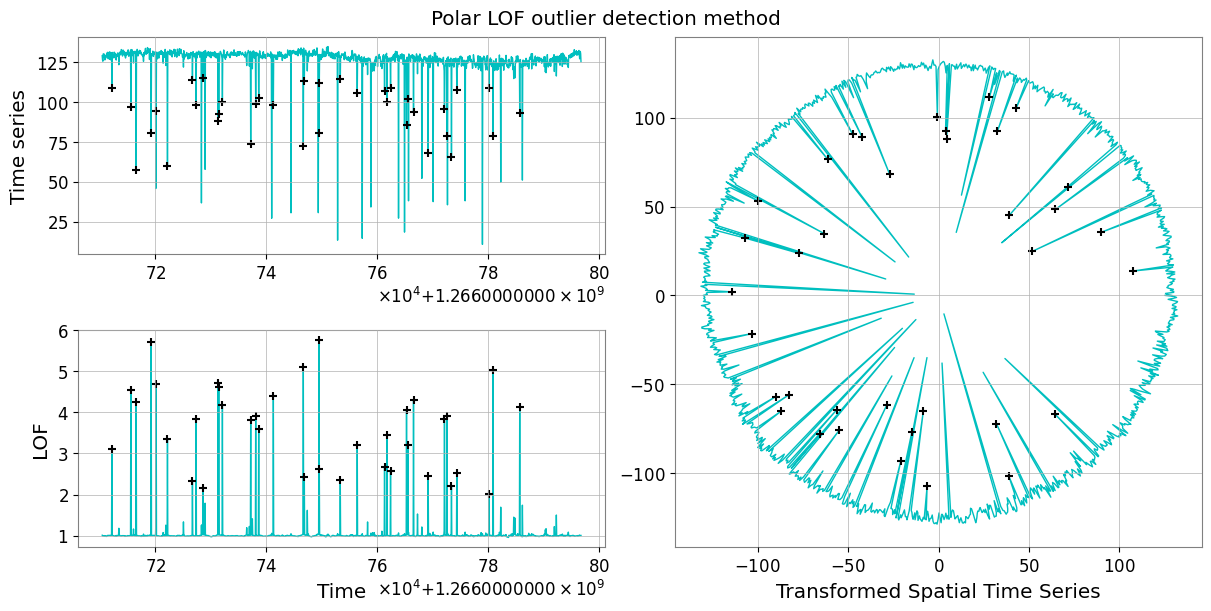

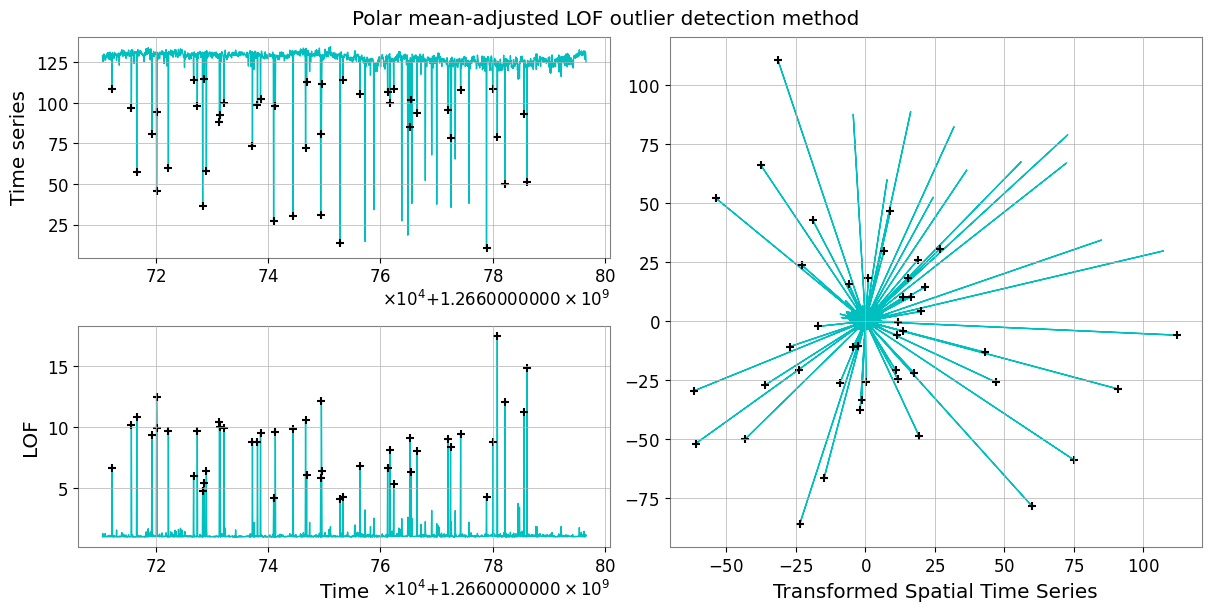

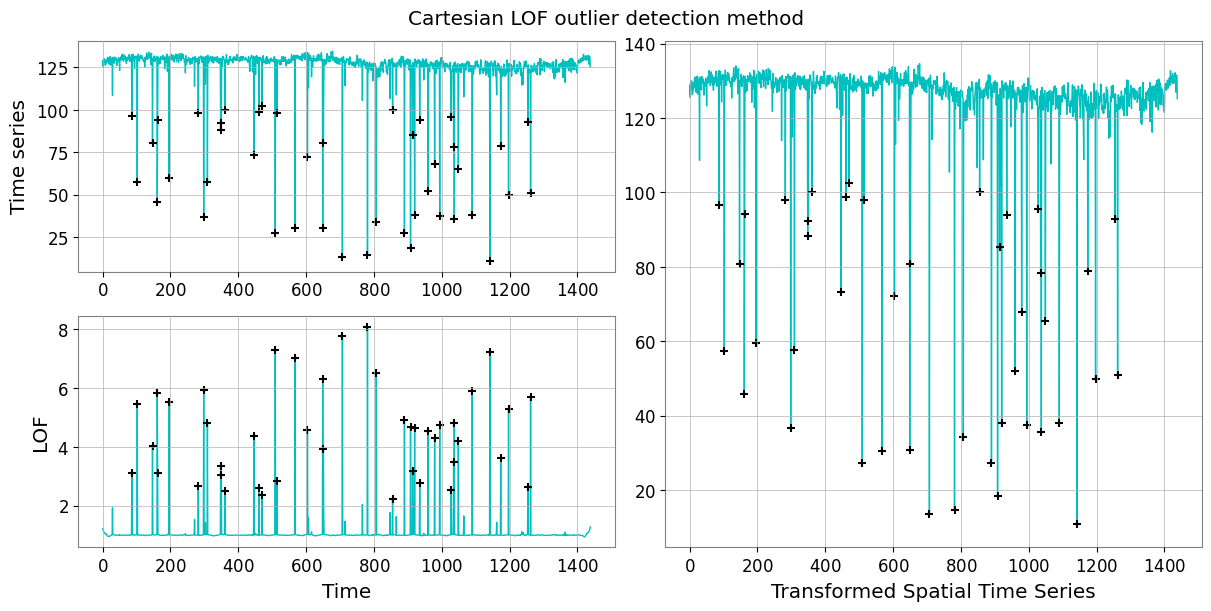

In [7]:
# Pulling data from channels to test the spline acting on outlier data in the range
channel = "L1:DMT-SNSW_EFFECTIVE_RANGE_MPC.mean"

# start and end represent the begining and end times (gps) that data is pulled from
# use tconvert(gps_time) to find the date

# start, end = (1268958018, 1269011267)
# start, end = (1264982418, 1265068758) # Feb 6, 2020 (seems to have gaps in data)
start, end = (1266710418, 1266796758) # Feb 26, 2020
# start, end = (1267315218, 1267401558) # Mar 4, 2020 (seems to have gaps in data)
# start, end = (1268956818, 1269043158) # Mar 23, 2020

def unpack_ts(ts):
    return ts.value, ts.times.value

ts = TimeSeries.get(channel, start, end)
data, times = unpack_ts(ts)

## Polar LOF
clf = SpatialLocalOutlierFactor(n_neighbors=20, crit_sigma=2, style='polar')
fig = plt.figure(figsize=(12,6), constrained_layout=True)
fig.suptitle('Polar LOF outlier detection method')
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('LOF')
rect2.set_xlabel('Time')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Transformed Spatial Time Series')

clf.fit(data, times)

plot_ts_outliers(clf, [rect1, rect2])
plot_2d_phase_space(clf.get_embedded_data(), square, outlier_ids=clf.get_outlier_indices())

## Polar mean LOF
clf = SpatialLocalOutlierFactor(n_neighbors=20, crit_sigma=2, style='polar_mean')
fig = plt.figure(figsize=(12,6), constrained_layout=True)
fig.suptitle('Polar mean-adjusted LOF outlier detection method')
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('LOF')
rect2.set_xlabel('Time')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Transformed Spatial Time Series')

clf.fit(data, times)

plot_ts_outliers(clf, [rect1, rect2])
plot_2d_phase_space(clf.get_embedded_data(), square, outlier_ids=clf.get_outlier_indices())

## Cartesian LOF
clf = SpatialLocalOutlierFactor(n_neighbors=20, crit_sigma=1.5, style='cartesian')
fig = plt.figure(figsize=(12,6), constrained_layout=True)
fig.suptitle('Cartesian LOF outlier detection method')
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('LOF')
rect2.set_xlabel('Time')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Transformed Spatial Time Series')

clf.fit(data, np.arange(data.size))

plot_ts_outliers(clf, [rect1, rect2])
plot_2d_phase_space(clf.get_embedded_data(), square, outlier_ids=clf.get_outlier_indices())